李宏毅视频
https://www.youtube.com/watch?v=kk6DqWreLeU

![Alt text](image.png)

![Alt text](image-1.png)

![Alt text](image-2.png)

![Alt text](image-3.png)

![Alt text](image-4.png)

## 强化学习的步骤
- 定义一个actor，actor实现的是个分类任务，当前状况s输入，输出是动作actor，actor根据概率分布，sample一个结果出来。
- 定义loss，
- 能做的动作，不能做的动作，

![Alt text](image-5.png)

- 前面的动作，对后面的影响很大，因此reward更大，
- 动作的reward不能都是正的，有些动作不能做，因此需要有正有负，因此要-b
- 

![Alt text](image-6.png)

## policy gradient
- 初始化一个网络actor0
- 用当前的actor去产生动作，获取一系列(s, a)
- 计算每一步产生的分数A，合并之后是loss
- 根据当前的loss去更新参数，得到新的actor，
- 持续迭代，得到最终的loss
- 每次更新只更新一次，因为新的actor产生的（s, a）只能用来更新当前的actor，比如初级的人下棋，一个平庸的招数是更符合下棋的actor的水平的，当时更强水平的人可能需要下出风险更高的招，这样收益才能更高，但是这个招对于初级水平的actor，这招拿到的reward却更低。

![Alt text](image-7.png)
![Alt text](image-8.png)

## off-policy vs on-policy
- train的actor和interact的actor是不是一样的，
- 一样的就是on-policy
- 不一样的就是off-policy
- (my comments) 区别是使用同一个数据集还是上面的说法？

## PPO
- 

![Alt text](image-9.png)
![Alt text](image-10.png)
![Alt text](image-11.png)
![Alt text](image-12.png)

## MC vs TD
- ![Alt text](image-13.png)
- ![Alt text](image-14.png)

![Alt text](image-15.png)

![Alt text](image-16.png)

- 定义一个额外的reward，因为大多数分数都是0，没有区分度，这个额外的reward就是reward shaping

![Alt text](image-17.png)
 
- 人工定义的reward很困难，往往做出意想不到的动作
- 比如上面图片中，机器人可能把所有人类监禁起来已获得最高的reward

![Alt text](image-18.png)

![Alt text](image-19.png)

![Alt text](image-20.png)

![Alt text](image-21.png)

## IRL
- 找个专家来做一遍动作
- 定义一个reward function，让actor的得分不超过专家
- actor尝试学习到参数，基于当时的reward function来让reward最大
- 输出reward function 和 actor
  

In [1]:
%%bash
pip install gymnasium
pip install gymnasium[box2d]

DEPRECATION: Loading egg at /home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/huggingface_hub-0.17.2-py3.8.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


DEPRECATION: Loading egg at /home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/huggingface_hub-0.17.2-py3.8.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/c3/8a/ba4b178267a4557adde824a6e53b74006e7852ebba8b0fab9f31dcf1e30b/swig-4.1.1-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.8 MB)
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp311-cp311-linux_x86_64.whl size=470941 sha256=2a17fa0858ad49ef1ddaf2465837039cbb41418a893a55cb0d46fa69a1e202a5
  Stored in directory: /home/frog/.cache/pip/wheels/7a/f7/33/5eb0d61c8a12f09f7c0a3c452ec17868430733031bf562eccb
Successfully built box2d-py


In [7]:
import gymnasium as gym
env = gym.make('CartPole-v1', render_mode="human")
env.reset()
for _ in range(1000):
   action = env.action_space.sample()  # this is where you would insert your policy
   observation, reward, terminated, truncated, info = env.step(action)
   print(action, observation, reward, terminated, truncated, info)
   if terminated or truncated:
      observation, info = env.reset()
      print("reset")
      break
      
env.close()

0 [ 0.02265334 -0.17626068  0.01574123  0.26564986] 1.0 False False {}
1 [ 0.01912812  0.01863311  0.02105422 -0.02202688] 1.0 False False {}
1 [ 0.01950078  0.2134469   0.02061369 -0.3079933 ] 1.0 False False {}
1 [ 0.02376972  0.40826914  0.01445382 -0.5941046 ] 1.0 False False {}
1 [ 0.03193511  0.60318583  0.00257173 -0.8821998 ] 1.0 False False {}
0 [ 0.04399882  0.40802905 -0.01507227 -0.58870953] 1.0 False False {}
0 [ 0.0521594   0.21312137 -0.02684646 -0.3008123 ] 1.0 False False {}
1 [ 0.05642183  0.40861547 -0.03286271 -0.6018397 ] 1.0 False False {}
0 [ 0.06459414  0.21396825 -0.0448995  -0.3196864 ] 1.0 False False {}
1 [ 0.0688735   0.40969995 -0.05129323 -0.62618405] 1.0 False False {}
1 [ 0.0770675   0.60549897 -0.06381691 -0.9345699 ] 1.0 False False {}
1 [ 0.08917748  0.801421   -0.0825083  -1.2466042 ] 1.0 False False {}
0 [ 0.1052059   0.6074484  -0.10744039 -0.98086506] 1.0 False False {}
1 [ 0.11735487  0.8038335  -0.12705769 -1.3052708 ] 1.0 False False {}
0 [ 0.

In [1]:
import gymnasium as gym
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if GPU is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))


class ReplayMemory(object):

    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

In [3]:
class DQN(nn.Module):

    def __init__(self, n_observations, n_actions):
        super(DQN, self).__init__()
        self.layer1 = nn.Linear(n_observations, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, n_actions)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x)

In [4]:
env = gym.make('CartPole-v1', render_mode="rgb_array")
env.reset()

(array([-0.00750997,  0.04971485,  0.03594683, -0.03872811], dtype=float32),
 {})

In [5]:
# BATCH_SIZE is the number of transitions sampled from the replay buffer
# GAMMA is the discount factor as mentioned in the previous section
# EPS_START is the starting value of epsilon
# EPS_END is the final value of epsilon
# EPS_DECAY controls the rate of exponential decay of epsilon, higher means a slower decay
# TAU is the update rate of the target network
# LR is the learning rate of the ``AdamW`` optimizer
BATCH_SIZE = 128
GAMMA = 0.99
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 1000
TAU = 0.005
LR = 1e-4

# Get number of actions from gym action space
n_actions = env.action_space.n
# Get the number of state observations
state, info = env.reset()
n_observations = len(state)

policy_net = DQN(n_observations, n_actions).to(device)
target_net = DQN(n_observations, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.AdamW(policy_net.parameters(), lr=LR, amsgrad=True)
memory = ReplayMemory(10000)


steps_done = 0


def select_action(state):
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1
    if sample > eps_threshold:
        with torch.no_grad():
            # t.max(1) will return the largest column value of each row.
            # second column on max result is index of where max element was
            # found, so we pick action with the larger expected reward.
            return policy_net(state).max(1)[1].view(1, 1)
    else:
        return torch.tensor([[env.action_space.sample()]], device=device, dtype=torch.long)


episode_durations = []


def plot_durations(show_result=False):
    plt.figure(1)
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    if show_result:
        plt.title('Result')
    else:
        plt.clf()
        plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated
    if is_ipython:
        if not show_result:
            display.display(plt.gcf())
            display.clear_output(wait=True)
        else:
            display.display(plt.gcf())

In [6]:
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
    # detailed explanation). This converts batch-array of Transitions
    # to Transition of batch-arrays.
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    with torch.no_grad():
        next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0]
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    # In-place gradient clipping
    torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
    optimizer.step()

Complete


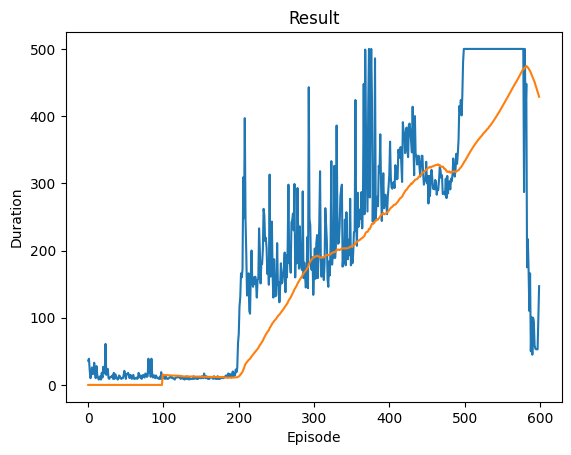

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [7]:
if torch.cuda.is_available():
    num_episodes = 600
else:
    num_episodes = 50

for i_episode in range(num_episodes):
    # Initialize the environment and get it's state
    state, info = env.reset()
    state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
    for t in count():
        action = select_action(state)
        observation, reward, terminated, truncated, _ = env.step(action.item())
        reward = torch.tensor([reward], device=device)
        done = terminated or truncated

        if terminated:
            next_state = None
        else:
            next_state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)

        # Store the transition in memory
        memory.push(state, action, next_state, reward)

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the policy network)
        optimize_model()

        # Soft update of the target network's weights
        # θ′ ← τ θ + (1 −τ )θ′
        target_net_state_dict = target_net.state_dict()
        policy_net_state_dict = policy_net.state_dict()
        for key in policy_net_state_dict:
            target_net_state_dict[key] = policy_net_state_dict[key]*TAU + target_net_state_dict[key]*(1-TAU)
        target_net.load_state_dict(target_net_state_dict)

        if done:
            episode_durations.append(t + 1)
            plot_durations()
            break

print('Complete')
plot_durations(show_result=True)
plt.ioff()
plt.show()

placeholder